# 📘 Introdução à Análise de Dados

## 🔍 Como funciona um Projeto de Análise de Dados?

Um projeto de análise de dados transforma informações brutas em **insights acionáveis**, apoiando decisões estratégicas dentro da empresa.  
O processo normalmente começa com um **problema de negócio**, seguido pela exploração, tratamento, modelagem e interpretação dos dados.

---

## 🎯 Contexto do Desafio

A empresa analisada atua no varejo de moda e enfrenta a necessidade de **melhorar seu desempenho de vendas**. Para isso, disponibilizou seus dados operacionais.

**Cenário atual:**
- 🏬 **5 lojas físicas**
- 👕 **Portfólio focado em bermudas**
- 📈 Desejo de **aumentar as vendas**

---

## ❓ Perguntas que orientam a análise

- Quais lojas têm melhor e pior desempenho?  
- Quais produtos mais contribuem para o faturamento?  
- Há padrões ao longo do tempo (dia, mês, ano)?  
- Existe diferença relevante de desempenho entre as unidades?  

### Importar Bibliotecas e Analisar Base de Dados

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
vendas = pd.read_excel('vendas.xlsx')
vendas[:10]

,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,2019-12-01,Iguatemi Campinas,Bermuda Estampa,1,169,169
1,2019-12-01,Iguatemi Esplanada,Bermuda Xadrez,1,155,155
2,2019-12-01,Norte Shopping,Bermuda,2,150,300
3,2019-12-01,Iguatemi Campinas,Bermuda Listrado,3,163,489
4,2019-12-01,Iguatemi Campinas,Bermuda Linho,3,195,585
5,2019-12-03,Iguatemi Campinas,Bermuda Xadrez,1,155,155
6,2019-12-03,Bourbon Shopping SP,Bermuda Listrado,1,163,163
7,2019-12-03,Bourbon Shopping SP,Bermuda Xadrez,3,155,465
8,2019-12-03,Bourbon Shopping SP,Bermuda Estampa,1,169,169
9,2019-12-04,Center Shopping Uberlândia,Bermuda Xadrez,4,155,620


### Passo 2 - Pegar um panorama geral sobre a sua base de dados

In [154]:
loja = vendas.groupby('ID Loja',as_index=False)['Valor Final'].sum().sort_values(by='Valor Final',ascending=True)
vendas_qtd_pro = vendas.groupby('Produto',as_index=False)['Quantidade'].sum().sort_values(by='Quantidade',ascending=True)
display(loja)
display(vendas_qtd_pro)

,ID Loja,Valor Final
3,Iguatemi Esplanada,2473
1,Center Shopping Uberlândia,2994
4,Norte Shopping,4322
0,Bourbon Shopping SP,4386
2,Iguatemi Campinas,41720


,Produto,Quantidade
2,Bermuda Linho,20
1,Bermuda Estampa,21
0,Bermuda,23
4,Bermuda Listrado,25
5,Bermuda Xadrez,28
3,Bermuda Liso,233


<h2 style="font-size:26px; font-weight:700; margin-bottom:10px;">
📌 Início da Análise
</h2>

Vamos iniciar a análise concentrando-nos em dois pilares essenciais:  
<strong>desempenho das lojas</strong> e <strong>comportamento dos produtos</strong>.  
Esses elementos fornecerão uma visão clara das oportunidades de melhoria e dos caminhos estratégicos para potencializar as vendas e otimizar os resultados.

<br>


<Axes: title={'center': 'Desempenho Lojas em R$'}, ylabel='ID Loja'>

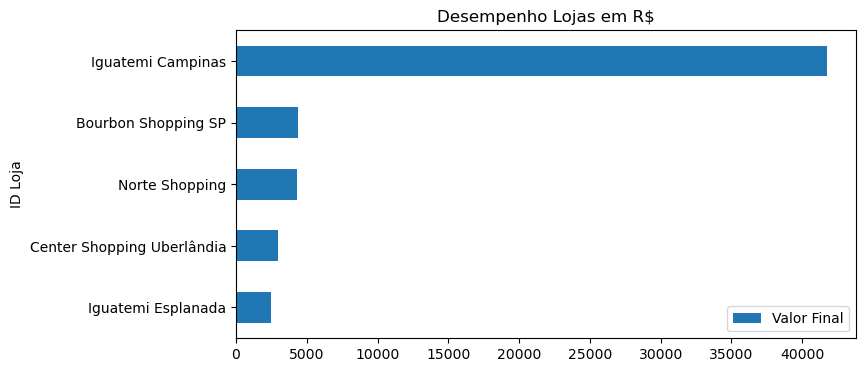

In [156]:
display(loja.plot(figsize=(8,4),kind='barh',title='Desempenho Lojas em R$',x='ID Loja'))

<h1 style="font-size:25px; font-weight:600; margin-bottom:10px;">
📊 Análise de Desempenho — Lojas
</h1>

A análise inicial do desempenho das unidades mostra uma diferença expressiva entre as lojas:

- <strong>🏆 Melhor Loja:</strong> Iguatemi Campinas  
- <strong>🔻 Pior Loja:</strong> Iguatemi Esplanada  

Esses resultados revelam oportunidades importantes para impulsionar o desempenho geral:  
reforçar estratégias de <strong>marketing</strong> na região da loja líder e <strong>replicar processos eficientes</strong> que contribuíram para seu sucesso nas demais unidades.  
Além disso, entender os fatores que limitam o desempenho da loja com menor resultado pode apoiar ações corretivas mais assertivas.

<br>

Com essa visão consolidada sobre o desempenho das lojas, avançaremos agora para a análise dos <strong>produtos</strong>, explorando como cada item contribui para o faturamento e onde estão as principais oportunidades de melhoria.<br><br>


<Axes: title={'center': 'Desempenho de Produtos em R$'}, ylabel='Produto'>

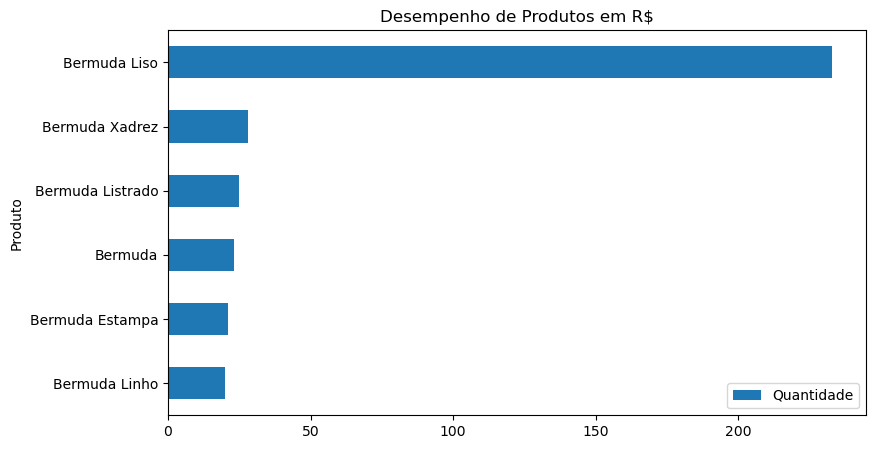

In [149]:
display(vendas_qtd_pro.plot(figsize=(9,5),kind='barh',title='Desempenho de Produtos em R$',x='Produto',y='Quantidade'))

<div style="background:#f7f7f7; padding:12px 18px; border-left:5px solid #2E86C1; border-radius:4px;">
<h2 style="margin:0; font-size:24px; color:#2E86C1;">
💰 Relação Produto × Preço
</h2>
<p style="margin:5px 0 0 0;">Analisando como o preço se distribui entre os produtos.</p>
</div>


<Axes: title={'center': 'Preço dos produtos em R$'}, xlabel='Produto'>

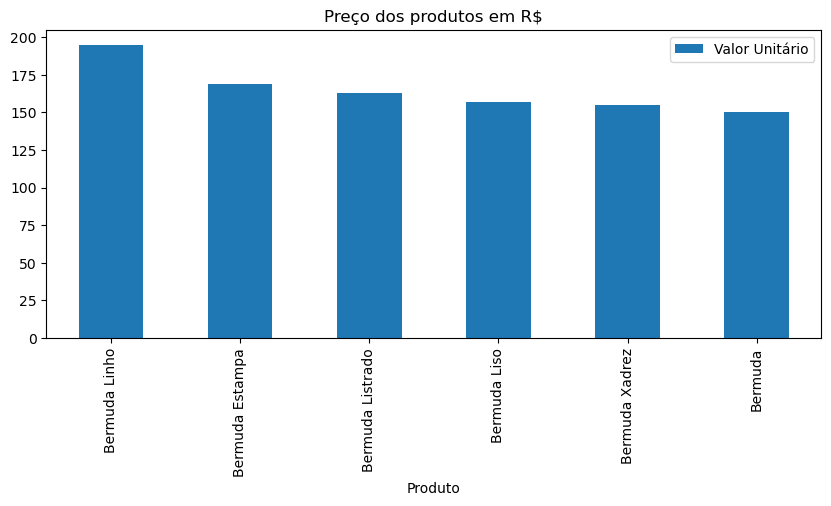

In [151]:
produtos_max = vendas.groupby('Produto', as_index=False)['Valor Unitário'].max()
produtos_max = produtos_max.sort_values(by='Valor Unitário', ascending=False)
display(produtos_max.plot(figsize=(10,4),kind='bar',title='Preço dos produtos em R$',x='Produto',y='Valor Unitário'))

<h1 style="font-size:28px; font-weight:700; margin-bottom:10px;">
 Análise de Desempenho — Produtos
</h1>

Outra oportunidade identificada na mesma análise diz respeito ao comportamento dos produtos:

- <strong>🛍️ Produto Mais Vendido:</strong> Bermuda Liso  
- <strong>📉 Produto com Menor Desempenho:</strong> Bermuda Linho  

O produto com melhor desempenho, <strong>Bermuda Liso</strong>, possui alta demanda e preço relativamente acessível — o que abre espaço para um leve reajuste positivo.  
Por outro lado, a <strong>Bermuda Linho</strong>, um dos itens mais caros e menos vendidos, poderia passar por uma <strong>redução de preço</strong> ou estratégias específicas para impulsionar as vendas.
